P6_3mc (186)

H14(A)=
 [[-1.51075    -2.03645874  0.          0.        ]
 [ 3.73863167  7.07825     0.          0.        ]
 [ 0.          0.         -0.85525     0.        ]
 [ 0.          0.          0.         -0.85525   ]]

H24(M)=
 [[-1.51075    -2.03645874 -0.         -0.        ]
 [ 3.73863167  7.07825    -0.         -0.        ]
 [-0.         -0.         -1.4966875   0.37033411]
 [-0.         -0.          0.37033411 -0.6414375 ]]

H13(M)=
 [[-1.51075    -2.03645874  0.          0.        ]
 [ 3.73863167  7.07825     0.          0.        ]
 [ 0.          0.         -1.4966875   0.37033411]
 [ 0.          0.          0.37033411 -0.6414375 ]]
---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 3
r-space dimension           = 3
number of spin components   = 1
periodic directions         = [0, 1, 2]
number of orbitals          = 16
number of electronic states = 16
lattice vectors:
 #  0  ===>  

<  6 | H | 13 + [  0 ,  0 ,  0 ] >     ===>     -0.0 +     0.0 i
<  6 | H | 13 + [  1 ,  1 ,  0 ] >     ===>     -0.0 +     0.0 i
<  6 | H | 13 + [  1 , -1 ,  0 ] >     ===>     -0.0 +     0.0 i
<  6 | H | 14 + [  0 ,  0 ,  0 ] >     ===>  -1.4967 +     0.0 i
<  6 | H | 14 + [  1 ,  1 ,  0 ] >     ===>  -1.4967 +     0.0 i
<  6 | H | 14 + [  1 , -1 ,  0 ] >     ===>  -1.4967 +     0.0 i
<  6 | H | 15 + [  0 ,  0 ,  0 ] >     ===>   0.3703 +     0.0 i
<  6 | H | 15 + [  1 ,  1 ,  0 ] >     ===>   0.3703 +     0.0 i
<  6 | H | 15 + [  1 , -1 ,  0 ] >     ===>   0.3703 +     0.0 i
<  7 | H |  8 + [  0 ,  0 ,  0 ] >     ===>      0.0 +     0.0 i
<  7 | H |  9 + [  0 ,  0 ,  0 ] >     ===>      0.0 +     0.0 i
<  7 | H | 10 + [  0 ,  0 ,  0 ] >     ===>      0.0 +     0.0 i
<  7 | H | 11 + [  0 ,  0 ,  0 ] >     ===>  -0.8552 +     0.0 i
<  7 | H | 12 + [  0 ,  0 ,  0 ] >     ===>     -0.0 +     0.0 i
<  7 | H | 12 + [  1 ,  1 ,  0 ] >     ===>     -0.0 +     0.0 i
<  7 | H | 12 + [  1 , -1

Plotting bandstructure...


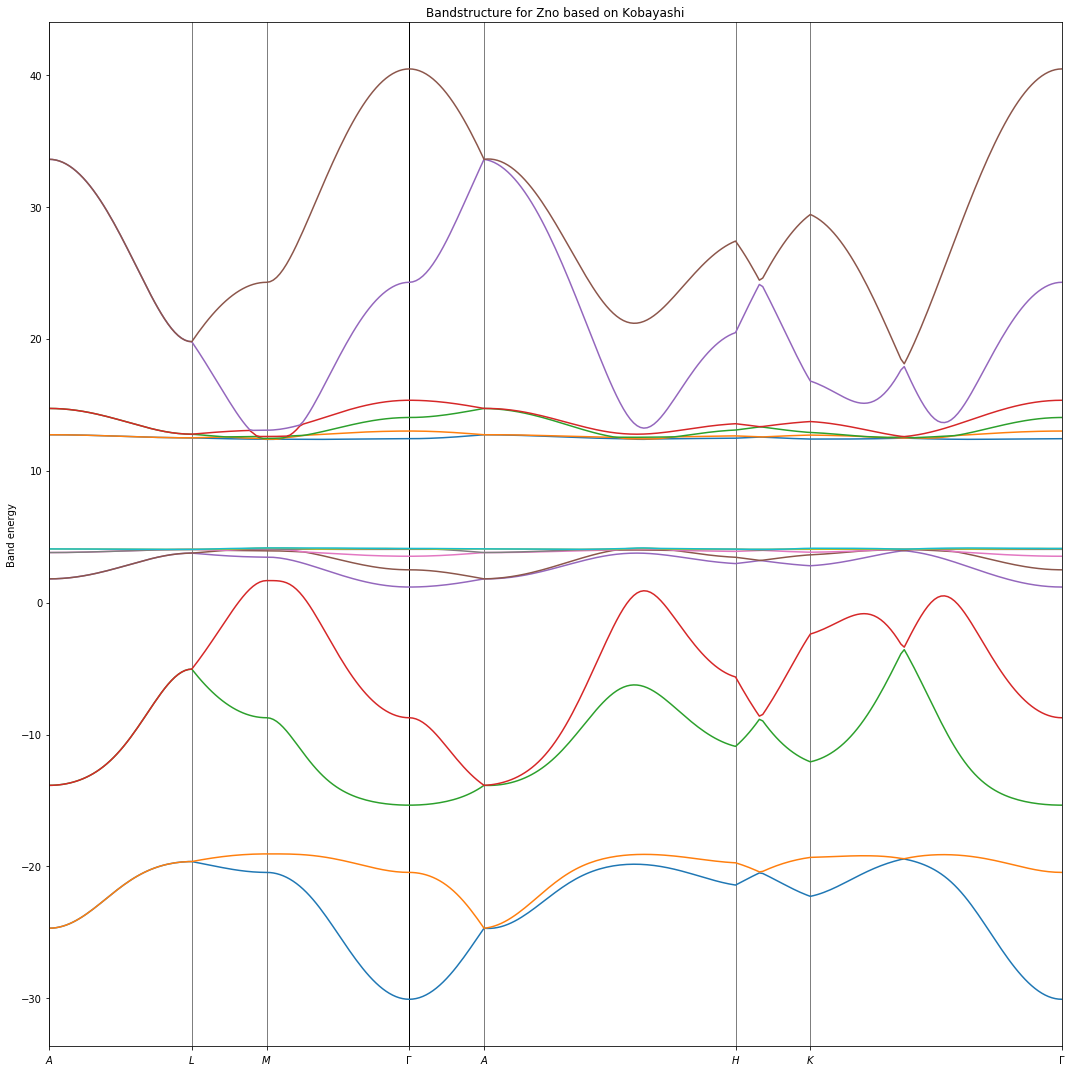

Done.



In [3]:
# !/usr/bin/env python

# buckled layer model on rectangular lattice
# illustrates usage of function k_path

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)

from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import pylab as plt
import spglib as spg
import seekpath as sp

lattice = np.array([
    [ np.sqrt(3)/2, -0.5, 0.0],
    [ 0.0, 1.0,  0.0],
    [ 0.0, 0.0, 1.65]])*3.28

positions = np.array([
    [0.0, 0.0, 0.0],
    [2/3, 1/3, 1/2],
    [2/3, 1/3, 1/8],
    [0.0, 0.0, 5/8]])

numbers = [8, 8, 30, 30]
atoms = ["O0", "O1", "Zn0", "Zn1"]
orbitals = ["s", "pz", "px", "py"]

O0 = positions[0]
O1 = positions[1]
Zn0 = positions[2]
Zn1 = positions[3]



#    s    px   py   pz
orb=[O0,  O0,  O0,  O0,
     O1,  O1,  O1,  O1,
     Zn0, Zn0, Zn0, Zn0,
     Zn1, Zn1, Zn1, Zn1]


# only first two lattice vectors repeat, so k-space is 2D
my_model=tb_model(3,3,lattice,orb)

# set on-site energies

Esa = -19.046
Epa =   4.142

Esc =   1.666
Epc =  12.368

# Given 

Vss   = -6.043
Vxx   =  7.157
Vxy   = 10.578
Vsapc =  4.703
Vpasc =  8.634


Uss = 0.25*Vss
Uzz = 0.25*(Vxx+2*Vxy)
Uxx = 0.25*(Vxx-Vxy)

Usz = -0.25*np.sqrt(3)*Vsapc
Uzs =  0.25*np.sqrt(3)*Vpasc

"""#################################################################"""

Usx =   0.0
Uxs =   0.0
Uzx =   0.0
Uxz =   0.0
Uyy =   0.0
"""################################################################"""

# Onsite Oxygen
Ea = np.array([[Esa, 0.0, 0.0, 0.0], 
               [0.0, Epa, 0.0, 0.0], 
               [0.0, 0.0, Epa, 0.0], 
               [0.0, 0.0, 0.0, Epa]])

# Onsite Zinc
Ec = np.array([[Esc, 0.0, 0.0, 0.0], 
               [0.0, Epc, 0.0, 0.0], 
               [0.0, 0.0, Epc, 0.0], 
               [0.0, 0.0, 0.0, Epc]])


H14 = np.array([[Uss, Usz, 0.0, 0.0],
                [Uzs, Uzz, 0.0, 0.0],
                [0.0, 0.0, Uxx, 0.0],
                [0.0, 0.0, 0.0, Uxx]])

H24 = np.array([[Uss, Usz, -Usx, (-np.sqrt(3)/2)*Usx],
                [Uzs, Uzz, -Uzx, (-np.sqrt(3)/2)*Uzx],
                [-Uxs, -Uxz, Uxx+(3/4)*(Uxx+Uyy), (-np.sqrt(3)/4)*(Uxx-Uyy)],
                [(-np.sqrt(3)/2)*Uxs, (-np.sqrt(3)/2)*Uxz, (-np.sqrt(3)/4)*(Uxx-Uyy), Uyy+(3/4)*(Uxx+Uyy)]])

H13 = np.array([[Uss, Usz, Usx, (np.sqrt(3)/2)*Usx],
                [Uzs, Uzz, Uzx, (np.sqrt(3)/2)*Uzx],
                [Uxs, Uxz, Uxx+(3/4)*(Uxx+Uyy), (-np.sqrt(3)/4)*(Uxx-Uyy)],
                [(np.sqrt(3)/2)*Uxs, (np.sqrt(3)/2)*Uxz, (-np.sqrt(3)/4)*(Uxx-Uyy), Uyy+(3/4)*(Uxx+Uyy)]])


H0 = np.zeros((4,4))


H = np.vstack([np.hstack([   Ea,    H0,   H13, H14]),
               np.hstack([ H0.T,    Ea,   H14, H24]),
               np.hstack([H13.T, H14.T,    Ec,  H0]),
               np.hstack([H14.T, H24.T,  H0.T,  Ec])])


cells = [
    [[],
     [],
     [[0, 0, 0], [-1, 0, 0],[-1, -1, 0]],
     [[0, 0, -1]]],
    
    [[],
     [],
     [[0, 0, 0]],
     [[0, 0, 0], [1, 1, 0],[1, -1, 0]]],
    
    [[[0, 0, 0], [1, 1, 0],[1, -1, 0]],
     [[0, 0, 0]],
     [],
     []],
    
    [[[0, 0, 1]],
     [[0, 0, 1], [-1, 0, 0],[-1, -1, 0]],
     [],
     []]    
]


for initial in range(16):
    for final in range(initial,16):
        
        if not (initial == final):
            for cell in cells[initial//4][final//4]:
                #print("From {}({}) to {}({}) in {}\t gives: {} eV".format(atoms[initial//4],orbitals[initial%4],atoms[final//4],orbitals[final%4],cell, H[initial][final]))

                try:
                    #continue     
                    my_model.set_hop(H[initial][final], initial, final,  cell) #dir -> indir

                except:
                    continue
my_model.set_onsite(np.diagonal(H))


print(spg.get_spacegroup((lattice,positions,numbers)))
print("\nH14(A)=\n",H14)
print("\nH24(M)=\n",H24)
print("\nH13(M)=\n",H13)

"""###################################################################################"""


#path = sp.get_explicit_k_path((lattice, positions, numbers), False, recipe="hpkot", threshold=1e-5,reference_distance=1)
#expath = path['explicit_kpoints_abs'][:5]
#labels = path['explicit_kpoints_labels'][:5]

# ----------------------------------------
# specify k-space path
# ----------------------------------------

# specify a path in k-space by listing a set of nodes; the path
# will consist of straight line segments connecting these nodes

path=[[0.0,0.0,0.5],[0.5,0.0,0.5],[0.5,0,0.0],[0.0,0.0,0.0],[0,0,0.5],[2./3.,1./3.,0.5],[2./3.,1./3.,0.0],[0,0,0]]
# specify labels for these nodal points
label=(r'$A $',      r'$L$',       r'$M$',   r'$\Gamma$', r'$A $', r'$H$',  r'$K$',r'$\Gamma $')

# call function k_path to construct the actual path
(k_vec,k_dist,k_node)=my_model.k_path(path,301)
# inputs:
#   path: see above
#   81: number of interpolated k-points to be plotted
# outputs:
#   k_vec: list of interpolated k-points
#   k_dist: horizontal axis position of each k-point in the list
#   k_node: horizontal axis position of each original node

# ----------------------------------------
# do bandstructure calculation
# ----------------------------------------
print('Calculating bandstructure...')
evals =my_model.solve_all(k_vec)

# ----------------------------------------
# plot band structure
# ----------------------------------------
print('Plotting bandstructure...')

# Initialize plot
fig, ax = plt.subplots(figsize=(15,15))
ax.set_title("Bandstructure for Zno based on Kobayashi")
ax.set_ylabel("Band energy")

# specify horizontal axis details
ax.set_xlim([0,k_node[-1]])
# put tickmarks and labels at node positions
ax.set_xticks(k_node)
ax.set_xticklabels(label)
# add vertical lines at node positions
for n in range(len(k_node)):
    if label[n] == r'$\Gamma$':
        ax.axvline(x=k_node[n],linewidth=1, color='k')
    else:
        ax.axvline(x=k_node[n],linewidth=0.5, color='k')
    

# Plot two bands
ax.plot(k_dist,evals[0])
ax.plot(k_dist,evals[1])
ax.plot(k_dist,evals[2])
ax.plot(k_dist,evals[3])
ax.plot(k_dist,evals[4])
ax.plot(k_dist,evals[5])
ax.plot(k_dist,evals[6])
ax.plot(k_dist,evals[7])
ax.plot(k_dist,evals[8])
ax.plot(k_dist,evals[9])
ax.plot(k_dist,evals[10])
ax.plot(k_dist,evals[11])
ax.plot(k_dist,evals[12])
ax.plot(k_dist,evals[13])
ax.plot(k_dist,evals[14])
ax.plot(k_dist,evals[15])
#ax.axhline(3.6, linestyle='--')
# save as PDF
fig.tight_layout()
#fig.savefig("direct_band.png")
#plt.ylim(0,15)
#plt.savefig("Bands_TB_ZnO_upper.png")
plt.show()
print('Done.\n')

In [4]:
res = 2
k_shape = (res,res,res)

            
k_vec=my_model.k_uniform_mesh(k_shape)


# solve for eigenenergies of hamiltonian on
# the set of k-points from above
evals, evec=my_model.solve_all(k_vec,eig_vectors=True)

print("Done!")
k_vec

Done!


array([[ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.5],
       [ 0. ,  0.5,  0. ],
       [ 0. ,  0.5,  0.5],
       [ 0.5,  0. ,  0. ],
       [ 0.5,  0. ,  0.5],
       [ 0.5,  0.5,  0. ],
       [ 0.5,  0.5,  0.5]])

In [ ]:
eC = min(evals[1])
kC = k_vec[(evals[1])==min(evals[1])][0]

eV = max(evals[0])
kV = k_vec[(evals[0])==max(evals[0])][0]

print("C_min=",eC,"at",kC)
print("V_max=",eV,"at",kV)
print("E_dir=",min(evals[1]-evals[0]),"at",k_vec[(evals[1]-evals[0])==min(evals[1]-evals[0])][0])
print("E_indir=",eC-eV,"with q=",kC-kV)

In [ ]:
np.save("k-vec", k_vec)
np.save("k-shape", k_shape)
np.save("E-band-0", evals[0])
np.save("E-band-1", evals[1])
np.save("W-band-0", evec[0])
np.save("W-band-1", evec[1])

In [ ]:
E = np.append(evals[0],evals[1])

binX = (np.linspace(0,0.5,25))
binY = (np.linspace(0,0.5,25))
binE = (np.linspace(-1.5,1.5,40))

hist, bins = np.histogram(E,bins=(binE))

plt.step(bins[:-1],hist)
plt.savefig("DOS%i.png"%(res))
plt.show()

In [ ]:
evec

In [ ]:
k_vec[:21,2]

In [ ]:
valence = evals[0]
conduct = evals[1]
kBool = k_vec[:,0] == 0.5

print(min(conduct)-max(valence[kBool]))